In [1]:
# importing libraries
import matplotlib.pyplot as plt
import pandas as pd

### Read the right hand data

In [3]:
dfr = pd.read_csv (r'./J_right.txt', sep = '\t') 
dfr

,Time,EMG,Muscle Force
0,0.000,0.000000,0.445479
1,0.001,0.000000,0.445479
2,0.002,0.000000,0.445479
3,0.003,0.000000,0.445479
4,0.004,0.000000,0.445479
...,...,...,...
240955,240.955,-0.065143,0.445479
240956,240.956,-0.214461,0.445479
240957,240.957,-0.054865,0.445479
240958,240.958,0.147321,0.445479


### Read the left hand data

In [62]:
dfl = pd.read_csv (r'./J_left.txt', sep = '\t') 
dfl

,Time,EMG,Muscle Force
0,0.000,0.000000,0.445853
1,0.001,0.000000,0.445853
2,0.002,0.000000,0.445853
3,0.003,0.000000,0.445853
4,0.004,0.000000,0.445853
...,...,...,...
247067,247.067,-0.254999,0.446600
247068,247.068,-0.053347,0.446600
247069,247.069,0.150930,0.446600
247070,247.070,0.235381,0.446600


### Graph the raw data (EMG and Time)

Text(0, 0.5, 'EMG (Volts)')

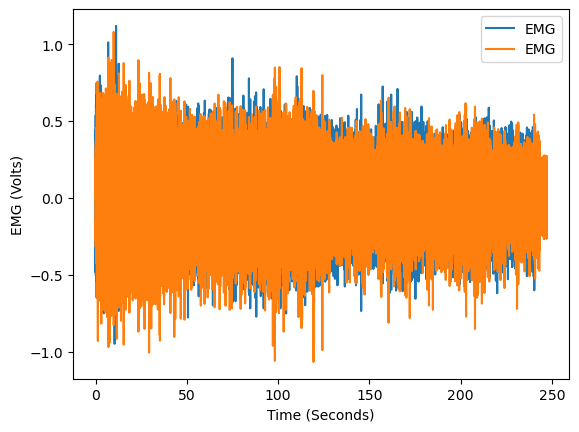

In [5]:
fig, ax = plt.subplots()
dfr.plot.line(ax = ax, y = 'EMG', x = 'Time')
dfl.plot.line(ax = ax, y = 'EMG', x = 'Time')
ax.set_xlabel("Time (Seconds)")
ax.set_ylabel("EMG (Volts)")

### Decide how you want to analyze the data... 

In [57]:
# Define the parameters 
window_size = 10  # Window size in seconds (how large of a window you want to take the avg max of)
step_size = 10 # Step size in seconds (how often you want to check the window size)


### Run the code that will perform the analysis and display results at bottom

In [58]:
# Initialize lists to store the calculated max values
max_values_r = []
time_intervals_r = []

max_values_l = []
time_intervals_l = []

# Iterate through the data in steps for dfr
for i in range(0, len(dfr), int(step_size / 0.001)):
    start_idx = i
    end_idx = start_idx + int(window_size / 0.001)
    
    if end_idx < len(dfr):
        window_data = dfr.iloc[start_idx:end_idx]
        max_value = window_data['EMG'].max()
        max_values_r.append(max_value)
        
        # Calculate the time interval (take the midpoint of the window)
        time_interval = window_data['Time'].mean()
        time_intervals_r.append(time_interval)

# Create a new DataFrame with the calculated max values and time intervals for dfr
result_df_r = pd.DataFrame({'Time': time_intervals_r, 'MaxEMG_R': max_values_r})

# Iterate through the data in steps for dfl
for i in range(0, len(dfl), int(step_size / 0.001)):
    start_idx = i
    end_idx = start_idx + int(window_size / 0.001)
    
    if end_idx < len(dfl):
        window_data = dfl.iloc[start_idx:end_idx]
        max_value = window_data['EMG'].max()
        max_values_l.append(max_value)
        
        # Calculate the time interval (take the midpoint of the window)
        time_interval = window_data['Time'].mean()
        time_intervals_l.append(time_interval)

# Create a new DataFrame with the calculated max values and time intervals for dfl
result_df_l = pd.DataFrame({'Time': time_intervals_l, 'MaxEMG_L': max_values_l})

# Calculate the percentage of max EMG for each 0.5 seconds interval for both dfr and dfl
result_df_r['MaxEMG_percent_R'] = (result_df_r['MaxEMG_R'] / result_df_r['MaxEMG_R'].max()) * 100
result_df_l['MaxEMG_percent_L'] = (result_df_l['MaxEMG_L'] / result_df_l['MaxEMG_L'].max()) * 100

# Display the results
print(result_df_r)
print(result_df_l)

        Time  MaxEMG_R  MaxEMG_percent_R
0     4.9995  1.011900         90.437845
1    14.9995  1.118890        100.000000
2    24.9995  0.518866         46.373281
3    34.9995  0.650892         58.173011
4    44.9995  0.631618         56.450411
5    54.9995  0.633092         56.582148
6    64.9995  0.584911         52.276006
7    74.9995  0.908165         81.166603
8    84.9995  0.778148         69.546425
9    94.9995  0.707078         63.194595
10  104.9995  0.613182         54.802706
11  114.9995  0.791544         70.743683
12  124.9995  0.541567         48.402166
13  134.9995  0.534971         47.812654
14  144.9995  0.672521         60.106087
15  154.9995  0.724776         64.776341
16  164.9995  0.709342         63.396938
17  174.9995  0.594825         53.162062
18  184.9995  0.498671         44.568367
19  194.9995  0.540635         48.318870
20  204.9995  0.525821         46.994879
21  214.9995  0.587172         52.478081
22  224.9995  0.496639         44.386758
23  234.9995  0.

### Set a threshold of Max_EMG_percent for fatigability determination (what % of max is considered fatigued)

In [59]:
threshold = 60

### Calculate when 'MaxEMG_percent' reaches approximately threshold

In [60]:
reached_threshold_R = result_df_r[result_df_r['MaxEMG_percent_R'] <= threshold]
time_at_threshold_R = reached_threshold_R['Time'].iloc[0]
reached_threshold_L = result_df_l[result_df_l['MaxEMG_percent_L'] <= threshold]
time_at_threshold_L = reached_threshold_L['Time'].iloc[0]
print(f"Time at ~{threshold} % of max for right hand: {time_at_threshold_R} seconds")
print(f"Time at ~{threshold} % of max for left hand: {time_at_threshold_L} seconds")

Time at ~60 % of max for right hand: 24.9995 seconds
Time at ~60 % of max for left hand: 54.9995 seconds


### Graph the EMG data including when it reaches fatigability threshold

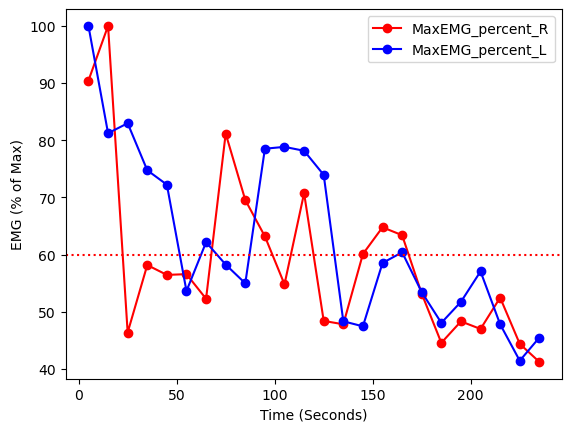

In [61]:
fig, ax = plt.subplots()
result_df_r.plot.line(ax = ax, y = 'MaxEMG_percent_R', x = 'Time', color = 'r', marker = 'o')
result_df_l.plot.line(ax = ax, y = 'MaxEMG_percent_L', x = 'Time', color = 'b', marker = 'o')
ax.set_xlabel("Time (Seconds)")
ax.set_ylabel("EMG (% of Max)")
plt.axhline(threshold, color='red', ls='dotted')

### Graph Left vs Right as an n of 1 (no error bars)

Text(0.5, 1.0, 'Fatigability Assay - Right vs Left Hand')

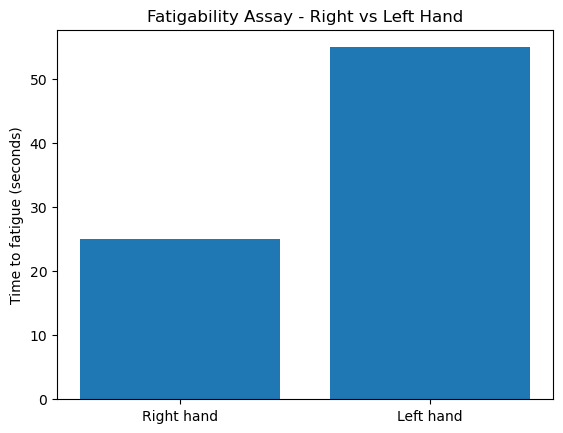

In [71]:
# build a bar plot
plt.bar(['Right hand', 'Left hand'],[time_at_threshold_R, time_at_threshold_L])
plt.ylabel('Time to fatigue (seconds)')
plt.title('Fatigability Assay - Right vs Left Hand')